After creating our master file (combining sentiment scores and returns), we separate our dataset based on npt values.

In our case we are making a quintile separation, so all the stocks are grouped in 5 parts, with Quintile 5 consisting of firms with most positive tone and Quintile 1 with least positive tone firms.

Now, we check the returns and npt in the respective Quintiles. 

#### In short, we are calculating the mean returns of all the firms in all the Quintiles (which we created based on Net Positive Tone) 



###### .

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('returns_tone_master.csv')

In [4]:
column_names = 'date','price','returns','cik','file_name','filing_date','phi_pos','phi_neg','phi_npt','num_cleaned_words','ticker'

In [5]:
df=df.reindex(columns= column_names)

In [6]:
df.head()

,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words,ticker
0,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
1,2005-03-17,9.2976,0.007258,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
2,2005-03-18,9.3221,0.002635,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
3,2005-03-21,9.2529,-0.007423,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
4,2005-03-22,8.9938,-0.028002,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP


In [7]:
date_cols = ['date', 'filing_date']
for date in date_cols:
    df[date] = pd.to_datetime(df[date], format='%Y-%m-%d')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236005 entries, 0 to 236004
Data columns (total 11 columns):
date                 236005 non-null datetime64[ns]
price                236005 non-null float64
returns              236005 non-null float64
cik                  236005 non-null int64
file_name            236005 non-null object
filing_date          236005 non-null datetime64[ns]
phi_pos              236005 non-null float64
phi_neg              236005 non-null float64
phi_npt              236005 non-null float64
num_cleaned_words    236005 non-null float64
ticker               236005 non-null object
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 19.8+ MB


In [9]:
df.describe()

,price,returns,cik,phi_pos,phi_neg,phi_npt,num_cleaned_words
count,236005.000000,236005.000000,2.360050e+05,236005.000000,236005.000000,236005.000000,236005.00000
mean,55.492823,0.001509,6.860205e+05,0.039175,0.024501,0.246101,7884.17981
std,55.534066,0.288962,4.883130e+05,0.007834,0.010180,0.180606,6385.43024
min,0.887400,-0.990096,2.969000e+03,0.007937,0.006944,-0.500000,126.00000
25%,24.346000,-0.008150,7.274100e+04,0.034250,0.018669,0.146789,4641.00000
50%,44.029000,0.000582,8.747160e+05,0.038675,0.022212,0.263021,6464.00000
75%,70.167000,0.009435,1.087423e+06,0.043808,0.027029,0.371237,8818.00000
max,1058.290000,99.305387,1.681459e+06,0.060961,0.070668,0.693950,53606.00000


In [10]:
# max is numbers are extremly high - outlier. so we will remove the outliers. 
# we consider outlier as anything that is 3 times of the standard numbers

In [11]:
df = df[abs(df['returns']) <=  (df['returns'].std() *3)]


In [12]:
df.describe()

,price,returns,cik,phi_pos,phi_neg,phi_npt,num_cleaned_words
count,235998.000000,235998.000000,2.359980e+05,235998.000000,235998.000000,235998.000000,235998.000000
mean,55.493106,0.000642,6.860129e+05,0.039175,0.024500,0.246107,7884.001475
std,55.534290,0.021570,4.883181e+05,0.007834,0.010180,0.180603,6384.950585
min,2.488900,-0.629504,2.969000e+03,0.007937,0.006944,-0.500000,126.000000
25%,24.346000,-0.008150,7.274100e+04,0.034250,0.018669,0.146789,4641.000000
50%,44.029000,0.000582,8.747160e+05,0.038675,0.022212,0.263021,6464.000000
75%,70.166750,0.009435,1.087423e+06,0.043808,0.027029,0.371237,8818.000000
max,1058.290000,0.577278,1.681459e+06,0.060961,0.070668,0.693950,53606.000000


In [13]:
# now we separate the data into quintile based on net positive tone, by creating a new column

In [14]:
q_labels = ['quintile' + str(i) for i in range(1,6)]

df['quintile_npt_rank'] = df.groupby('date')['phi_npt'].transform(lambda x: pd.qcut(x=x, q=5, labels = q_labels ))

In [15]:
df.head()

,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words,ticker,quintile_npt_rank
0,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP,quintile1
1,2005-03-17,9.2976,0.007258,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP,quintile1
2,2005-03-18,9.3221,0.002635,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP,quintile1
3,2005-03-21,9.2529,-0.007423,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP,quintile1
4,2005-03-22,8.9938,-0.028002,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP,quintile1


In [16]:
# firms can belong to any quintile based on the prices in the respective time, like below:

In [17]:
df[df['ticker'] == 'CNP']['quintile_npt_rank'].value_counts()

quintile2    1520
quintile3    1274
quintile1     395
quintile5       0
quintile4       0
Name: quintile_npt_rank, dtype: int64

In [18]:
df.groupby('quintile_npt_rank')['ticker'].value_counts().unstack()

ticker,A,ADBE,AES,AKAM,ALK,ALL,AMGN,APC,APD,ARE,...,TRIP,TROW,TSCO,ULTA,UNM,V,VAR,VIAB,WCG,ZTS
quintile_npt_rank,,,,,,,,,,,,,,,,,,,,,
quintile1,NaN,NaN,2691.0,NaN,240.0,3203.0,254.0,171.0,250.0,497.0,...,NaN,251.0,NaN,NaN,504.0,NaN,747.0,NaN,NaN,NaN
quintile2,740.0,NaN,472.0,252.0,209.0,NaN,1763.0,2766.0,250.0,1890.0,...,NaN,NaN,NaN,NaN,1754.0,NaN,1621.0,NaN,NaN,NaN
quintile3,951.0,NaN,17.0,768.0,1261.0,NaN,934.0,253.0,858.0,802.0,...,NaN,NaN,121.0,NaN,933.0,1005.0,572.0,1000.0,249.0,NaN
quintile4,783.0,938.0,NaN,983.0,1245.0,NaN,243.0,NaN,647.0,NaN,...,NaN,765.0,1162.0,346.0,NaN,251.0,60.0,257.0,1434.0,668.0
quintile5,504.0,1776.0,NaN,1186.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1426.0,2184.0,1910.0,2067.0,NaN,NaN,NaN,NaN,1275.0,499.0


In [19]:
# now we will average the returns based on quintiles.
# by grouping returns based on quintile and date

In [20]:
sentiment_return = df.groupby(['date','quintile_npt_rank'])['returns'].mean().unstack()

In [21]:
sentiment_return.head()

quintile_npt_rank,quintile1,quintile2,quintile3,quintile4,quintile5
date,,,,,
2005-02-24,0.020009,NaN,NaN,NaN,0.029873
2005-02-25,0.006221,NaN,NaN,NaN,0.017834
2005-02-28,-0.006721,0.002292,-0.009611,-0.006633,-0.009890
2005-03-01,0.007352,0.004593,0.024596,0.001139,0.012133
2005-03-02,-0.003139,-0.007467,0.000705,0.005407,0.001424


In [22]:
sentiment_return.dropna(inplace=True)

In [23]:
#sentiment_return.describe()

In [24]:
sentiment_return.head()

quintile_npt_rank,quintile1,quintile2,quintile3,quintile4,quintile5
date,,,,,
2005-02-28,-0.006721,0.002292,-0.009611,-0.006633,-0.009890
2005-03-01,0.007352,0.004593,0.024596,0.001139,0.012133
2005-03-02,-0.003139,-0.007467,0.000705,0.005407,0.001424
2005-03-03,-0.002653,0.000331,0.004094,-0.005462,-0.004653
2005-03-04,0.008558,0.020013,0.007742,0.008317,0.008014


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#sentiment_return.dropna().unstack()

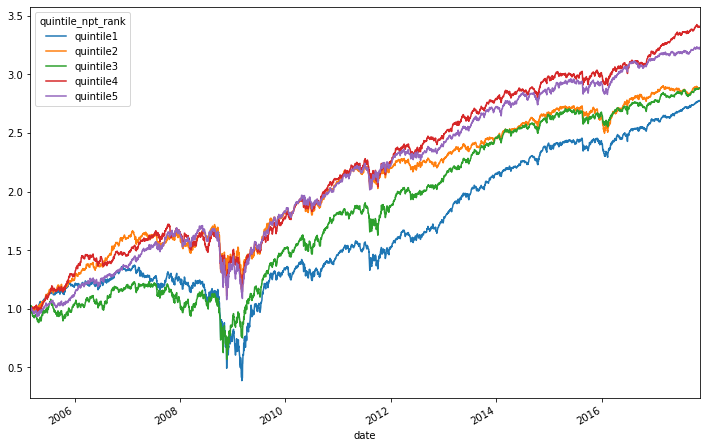

In [27]:
(1 + sentiment_return.cumsum()).plot(figsize=(12 ,8))